In [162]:
from sklearn import datasets
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
random.seed(13)

In [163]:
X, y = datasets.make_blobs(n_samples=1000,n_features=2,
                           centers=3,cluster_std=0.38,
                           random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                test_size=0.33, random_state=42)

In [164]:
def one_hot(a):
  b = np.zeros((a.size, a.max()+1))
  b[np.arange(a.size), a] = 1
  return b

def cast_matrix(test_matrix, data_type):
    return list(map(lambda sub: list(map(data_type, sub)), test_matrix))

In [165]:
m, n = X_train.shape
a=np.empty(m); a.fill(1)
x_tr = np.concatenate((a.reshape(-1, 1), X_train), axis=1)

p, q = X_test.shape
a=np.empty(p); a.fill(1)
x_te = np.concatenate((a.reshape(-1, 1), X_test), axis=1)


y_tr = one_hot(y_train)
y_tr = cast_matrix(y_tr, int)
y_tr = np.array(y_tr)

y_te = one_hot(y_test)
y_te = cast_matrix(y_te, int)
y_te = np.array(y_te)

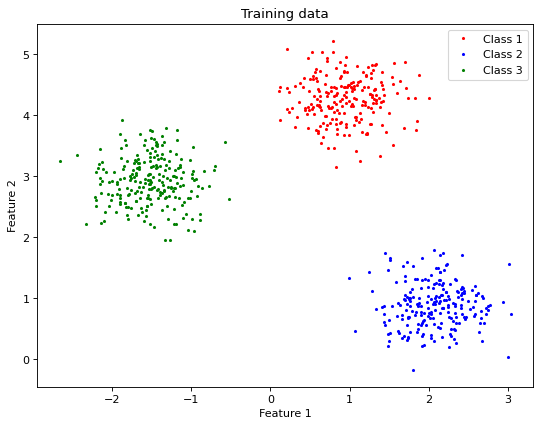

In [166]:
fig = plt.figure(figsize=(8,6), dpi = 80)
plt.plot(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], 'rp', markersize = 2, label = 'Class 1')
plt.plot(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], 'bp', markersize = 2, label = 'Class 2')
plt.plot(X_train[:, 0][y_train == 2], X_train[:, 1][y_train == 2], 'gp', markersize = 2, label = 'Class 3')
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('Training data')
plt.show()

In [168]:
def activation(z):
  a = np.zeros((1,3), dtype=int)
  idx=np.argmax(z)
  a[0][idx]= 1
  return a[0]

def mc_perceptron(xtr, ytr, epochs):
  m,n = xtr.shape
  n_miss_list = []
  theta = np.random.random((3, 3))
  theta_batch = np.zeros((3, 3))
  for epoch in range(epochs):
    n_miss = 0
    for idx, x_i in enumerate(xtr):
      u = np.dot(x_i,theta)
      # print(activation(u))
      pre = np.array(activation(u))
      comparison = pre == ytr[idx]
      if( comparison.all()) == False:
        n_miss += 1
        act = np.where(ytr[idx] > 0)
        pr  = np.where(pre > 0)
        theta_batch[act] += x_i
        theta_batch[pr] -= x_i
    theta = theta_batch/m
    n_miss_list.append(n_miss)
  return theta, n_miss_list

In [178]:
weights, miss_l = mc_perceptron(x_tr, y_tr, 90)
weights

array([[-0.09552239, -0.20019944,  1.63458827],
       [ 0.44179104,  1.72649923, -0.81105768],
       [-0.34626866, -1.5262998 , -0.82353059]])

In [179]:
x_i = np.insert(X_test[10], 0, 1).reshape(-1,1)
np.dot(weights, x_i)

array([[ 6.72326745],
       [-1.77800938],
       [-4.94525806]])

In [180]:
y_pred = []
for idx, x_i in enumerate(x_te):
  u = np.dot(x_i,weights)
  y_pred.append(activation(u))
y_pred = np.array(y_pred)

y_pre = []
p, q = y_te.shape
for j in range(p):
  y_pre.append((np.where(y_pred[j] > 0))[0][0])
y_pre = np.array(y_pre)
y_pre

array([0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2,
       1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2,
       1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 0, 1, 1, 2, 1, 0, 1, 2, 1,
       1, 2, 2, 1, 2, 0, 2, 2, 1, 0, 2, 1, 2, 0, 1, 1, 1, 0, 2, 2, 1, 0,
       1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 2, 0, 1, 2, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 0, 1, 2, 1,
       1, 2, 1, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 0, 1,
       0, 2, 1, 1, 0, 2, 2, 0, 1, 2, 1, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 1, 2, 1, 2,
       0, 2, 2, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 0, 2, 0,

In [181]:
y_test

array([0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2,
       1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2,
       1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 0, 1, 1, 2, 1, 0, 1, 2, 1,
       1, 2, 2, 1, 2, 0, 2, 2, 1, 0, 2, 1, 2, 0, 1, 1, 1, 0, 2, 2, 1, 0,
       1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 2, 0, 1, 2, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 0, 1, 2, 1,
       1, 2, 1, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 0, 1,
       0, 2, 1, 1, 0, 2, 2, 0, 1, 2, 1, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 1, 2, 1, 2,
       0, 2, 2, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 0, 2, 0,

In [182]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print(cm)

[[118   0   0]
 [  0 113   0]
 [  0   0  99]]


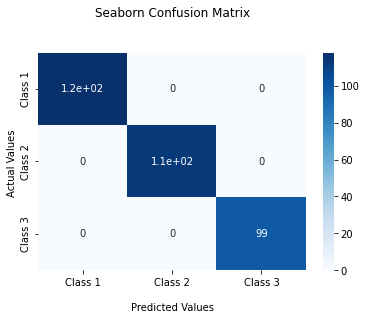

In [183]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Class 1','Class 2', 'Class 3'])
ax.yaxis.set_ticklabels(['Class 1','Class 2', 'Class 3'])

plt.show()